# Power consumption dataset

This notebook contains a partial explorative analysis on a power dataset
Download the dataset into the relative directory `raw/power`. Attention: there are two `raw` folders, one for the used datasets, one for the unused (located in the directory of this notebook). Just extract the zip in there and run the notebook

Attached the dir

```bash
> l raw
drwxr-xr-x  2 juli users 4.0K Dec 11 21:01 mobile
drwxr-xr-x  2 juli users 4.0K Dec 11 21:01 crimes
drwxr-xr-x  2 juli users 4.0K Dec 11 19:27 planets
drwxr-xr-x  2 juli users 4.0K Dec 12 12:42 power
drwxr-xr-x 21 juli users 4.0K May 14  2013 sports
```


In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
from explpowerconsumption import *

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [2]:
k = PowerConsumption()

/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
k.data.shape

(2075259, 9)

#  Step 1 - Data cleansing


For getting to know the data a little bit better, make a sample and store it. 
```bash
head -n 100 Chicago_Crimes_2001_to_2004.csv > sample.csv
```

Our first step was to inspect the csv - able data as it is. Observations:
- Location, if given, spearated into two fileds in a strange format


In [4]:
ID_DATE, ID_TIME, ID_ACTIVE_POWER, ID_REACTIVE_POWER, ID_VOLTAGE, ID_INTENSITY, \
_ , _ , _  =  np.arange(9)

## Step 1a) - Inspecting raw data as it is loaded into our program

In [5]:
data = k.data
print(k.data[:,ID_TIME])


['17:24:00' '17:25:00' '17:26:00' ..., '21:00:00' '21:01:00' '21:02:00']


In [6]:
## Inspecting data
voltage = data[:,ID_VOLTAGE]
intens   = data[:,ID_INTENSITY]
times    = data[:,ID_TIME]

fil = np.array([intens != "?"]).astype(int) \
    * np.array([voltage != "?"]).astype(int)
#    * np.array([times != "?"]).astype(int) \
fil = fil[0].astype(bool)


voltage = (voltage[fil]).astype(float)
intens = (intens[fil]).astype(float)
times = (times[fil]).astype(str)

shapes = times.shape[0]
hod = np.array([(times[i])[:2] for i in np.arange(shapes)])


In [7]:
print(hod)
print(fil)
print(intens)

['17' '17' '17' ..., '21' '21' '21']
[ True  True  True ...,  True  True  True]
[ 18.4  23.   23.  ...,   3.8   3.8   3.8]


In [8]:
print(times.shape)

(2049280,)


### Definition of Filters 
for cleansing

In [9]:
print(hod.shape, voltage.shape, intens.shape, times.shape)

(2049280,) (2049280,) (2049280,) (2049280,)


<IPython.core.display.Javascript object>


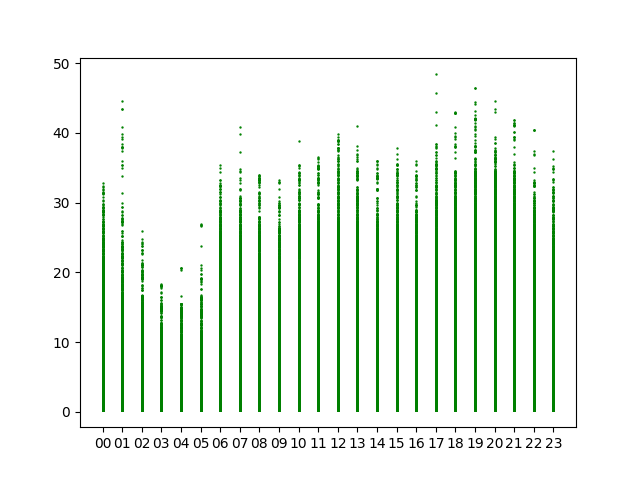

In [16]:
plt.figure()
plt.title("")
plt.scatter(hod, intens[:], s=.5, c="green")